<a href="https://colab.research.google.com/github/bin010203/hello-world/blob/master/01_06%2B3%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D_%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8%E7%9A%84%E4%BF%82%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 實作06：利用梯度下降法求簡單線性回歸的係數

### (0)掛載雲端硬碟

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (1)import必要的套件

In [2]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
twfont1 = plt_font.FontProperties(fname="/content/drive/MyDrive/Colab Notebooks/kaiu.ttf")

In [3]:
import pandas as pd

### (2)將原始資料分為訓練資料集和驗證資料集

In [4]:
#由SalesVolume.csv檔案載入資料集
data= np.loadtxt("/content/drive/MyDrive/Colab Notebooks/SalesVolume.csv",delimiter=",")


In [5]:
data

array([[ 24.,  22.,  15.,   4.,   9.,  20.,   5.,   3.,  17.,  19.,  13.,
         10.,  12.,  11.,  16.,  27.,  16.,  16.,   6.,  20.],
       [591., 543., 410., 310., 319., 520., 338., 330., 501., 508., 399.,
        331., 390., 390., 431., 660., 409., 430., 323., 524.]])

In [6]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,24.0,22.0,15.0,4.0,9.0,20.0,5.0,3.0,17.0,19.0,13.0,10.0,12.0,11.0,16.0,27.0,16.0,16.0,6.0,20.0
1,591.0,543.0,410.0,310.0,319.0,520.0,338.0,330.0,501.0,508.0,399.0,331.0,390.0,390.0,431.0,660.0,409.0,430.0,323.0,524.0


In [7]:
#DataFrame隨機排序 frac=1傳回全部的項目,
#reset_index() 方法來重置 DataFrame 索引
#drop=True 選項防止將 index 新增為新的行(column)。
df_shuffled=df.sample(frac=1,axis=1).reset_index(drop=True)
df_shuffled

,19,12,3,7,4,15,18,16,8,0,6,17,2,11,5,14,13,9,1,10
0,20.0,12.0,4.0,3.0,9.0,27.0,6.0,16.0,17.0,24.0,5.0,16.0,15.0,10.0,20.0,16.0,11.0,19.0,22.0,13.0
1,524.0,390.0,310.0,330.0,319.0,660.0,323.0,409.0,501.0,591.0,338.0,430.0,410.0,331.0,520.0,431.0,390.0,508.0,543.0,399.0


In [8]:
data = np.array(df_shuffled)

In [9]:
data

array([[ 20.,  12.,   4.,   3.,   9.,  27.,   6.,  16.,  17.,  24.,   5.,
         16.,  15.,  10.,  20.,  16.,  11.,  19.,  22.,  13.],
       [524., 390., 310., 330., 319., 660., 323., 409., 501., 591., 338.,
        430., 410., 331., 520., 431., 390., 508., 543., 399.]])

In [10]:
data_x=data[0]#第1列為廣告推播次數
data_y=data[1]#第2列為商品銷售數量
#訓練資料集12筆
train_x=data_x[:12]
train_y=data_y[:12]
#驗證資料集8筆
valid_x=data_x[12:]
valid_y=data_y[12:]


In [11]:
data_x

array([20., 12.,  4.,  3.,  9., 27.,  6., 16., 17., 24.,  5., 16., 15.,
       10., 20., 16., 11., 19., 22., 13.])

In [12]:
train_x

array([20., 12.,  4.,  3.,  9., 27.,  6., 16., 17., 24.,  5., 16.])

In [13]:
valid_x

array([15., 10., 20., 16., 11., 19., 22., 13.])

### (3)隨機初始化偏值b，權重w 

In [14]:
b=np.random.rand()
w=np.random.rand()
print("b = ",b ," w = ",w)

b =  0.3423928189820217  w =  0.9227732309862049


## (4)定義迴歸模型的線性函數

###偏值b，權重w(斜率)

In [15]:
def F(x):
  return b+w*x

## (5)定義損失函數LOSS Funcation

In [16]:
# L=1/2*(y-y^)**2
def Loss(x,y):
  return 0.5*np.sum((y-F(x))**2)

## (6)設定學習率和權重更新次數

In [17]:
ETA=0.0001#學習率
#儲存學習的狀態,# 偏值b，權重w(斜率)
Step_Loss=[]
Step_b=[]
Step_w=[]

## (7)開始訓練模型,看Loss值變化化圖形,for 迴圈可以改成13000~15000

In [18]:
# epoch 訓練的回合, ETA 學習率
# 偏值b，權重w(斜率)
for epoch in range(20000):
  b=b-ETA*np.sum(F(train_x)-train_y)
  w=w-ETA*np.sum((F(train_x)-train_y)*train_x)
            #跑100次才印一次,epoch從0開始,故+1,印太多會降低效率
  if epoch%100==99:
    current_loss=Loss(train_x,train_y)
    print("訓練次數:",epoch+1,"\nb:",b,"\nw:",w,
          "\n損失函數:",current_loss)
    Step_Loss.append(current_loss)
    Step_b.append(b)
    Step_w.append(w)
    #display.clear_output(wait=True)

訓練次數: 100 
b: 8.985936241021403 
w: 27.133038372146512 
損失函數: 88302.04999122219
訓練次數: 200 
b: 15.912074575097623 
w: 26.741804946677206 
損失函數: 83494.27347447973
訓練次數: 300 
b: 22.63223093919396 
w: 26.362206725099654 
損失函數: 78968.20931803045
訓練次數: 400 
b: 29.152531195935484 
w: 25.993897678775312 
損失函數: 74707.35054538208
訓練次數: 500 
b: 35.47891902601697 
w: 25.636542069888115 
損失函數: 70696.15740871712
訓練次數: 600 
b: 41.61716134625701 
w: 25.28981414539755 
損失函數: 66920.0007139888
訓練次數: 700 
b: 47.57285356652053 
w: 24.953397840093423 
損失函數: 63365.10846689115
訓練次數: 800 
b: 53.35142469030118 
w: 24.626986488481737 
損失函數: 60018.51564511629
訓練次數: 900 
b: 58.958142263613595 
w: 24.310282545239012 
損失函數: 56868.01691371337
訓練次數: 1000 
b: 64.39811717670655 
w: 24.002997313980217 
損失函數: 53902.12211109823
訓練次數: 1100 
b: 69.67630832297417 
w: 23.70485068409313 
損失函數: 51110.01434336634
訓練次數: 1200 
b: 74.7975271193121 
w: 23.41557087539915 
損失函數: 48481.51053407582
訓練次數: 1300 
b: 79.76644189203881 
w: 23

### (8)畫圖檢查模型訓練結果

###def F(x)=b+w*x ,偏值b，權重w(斜率)

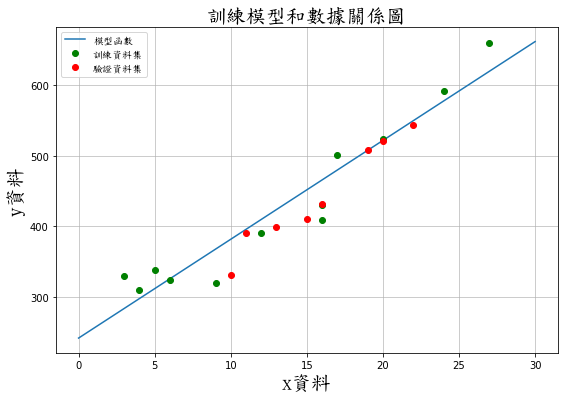

In [19]:
plt.figure(figsize=(9,6))
plt.title("訓練模型和數據關係圖",
          fontproperties=twfont1,fontsize=20) 
plt.xlabel("x資料",fontproperties=twfont1,fontsize=20) 
plt.ylabel("y資料",fontproperties=twfont1,fontsize=20)
x=np.linspace(0,30, 2000)
plt.plot(x, F(x),label="模型函數")
plt.plot(train_x, train_y, 'go',label="訓練資料集")
plt.plot(valid_x, valid_y, 'ro',label="驗證資料集")
plt.legend(prop=twfont1)
plt.grid('k-', alpha=0.8)
plt.show()

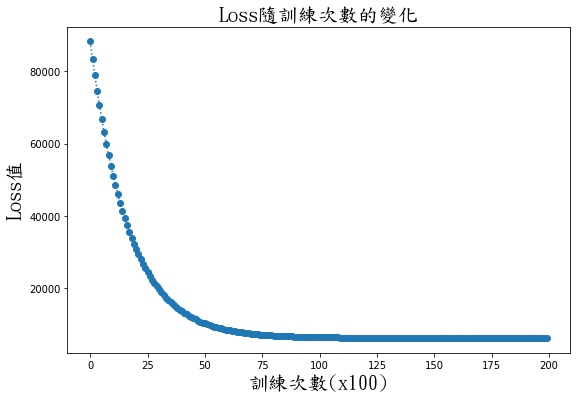

In [20]:
plt.figure(figsize=(9,6))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20) 
plt.xlabel("訓練次數(x100)",fontproperties=twfont1,fontsize=20) 
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(Step_Loss,":o")
plt.show()

### (9)觀察Loss值隨訓練次數的變化

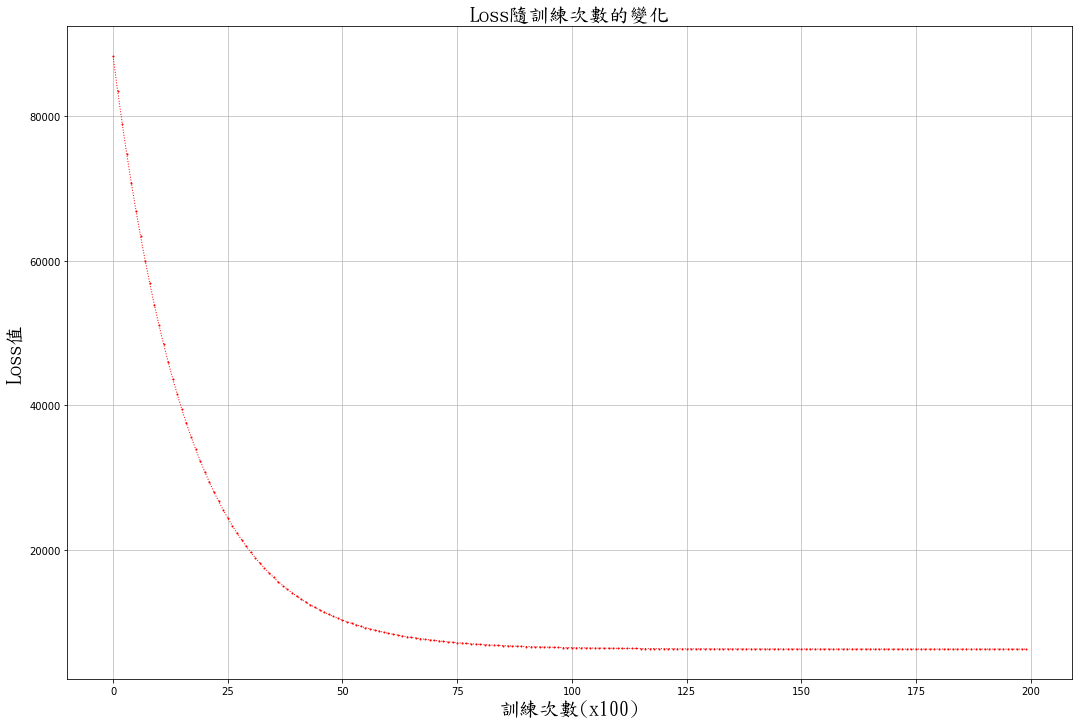

In [21]:
plt.figure(figsize=(18,12))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20) 
plt.xlabel("訓練次數(x100)",fontproperties=twfont1,fontsize=20) 
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(Step_Loss,"r:o",lw=1, ms=1)
plt.grid('k-', alpha=0.8)
plt.show()

### (10)比較訓練好的迴歸模型函數在訓練資料集和驗證資料集的每筆平均Loss值

In [22]:
print("訓練資料集對回歸模型的每筆平均Loss值",
      Loss(train_x, train_y)/np.size(train_x))
print("驗證資料集對回歸模型的每筆平均Loss值",
      Loss(valid_x, valid_y)/np.size(valid_x))

訓練資料集對回歸模型的每筆平均Loss值 520.9816525051453
驗證資料集對回歸模型的每筆平均Loss值 382.4439175923246


In [23]:
#I stop Runall

### (11)動畫顯示偏值b和權重w的移動路徑

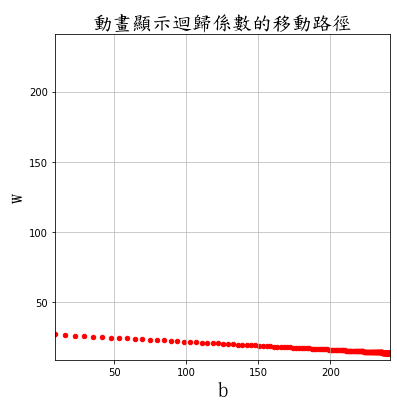

In [24]:
for i in range(len(Step_b)):
    plt.figure(figsize=(6,6))
    plt.title("動畫顯示迴歸係數的移動路徑",
              fontproperties=twfont1,fontsize=20)
    plt.xlabel("b",fontproperties=twfont1,fontsize=20) 
    plt.ylabel("w",fontproperties=twfont1,fontsize=20) 
    # X軸、Y軸刻度取array([Step_b,Step_w])的極值
    plt.xlim(np.min(np.array([Step_b,Step_w])),
             np.max(np.array([Step_b,Step_w])))
    plt.ylim(np.min(np.array([Step_b,Step_w])),
             np.max(np.array([Step_b,Step_w])))
    plt.scatter(Step_b[:i], Step_w[:i], s=20,color='r')
    plt.grid('k-', alpha=0.8)
    plt.pause(0.1)
    display.clear_output(wait=True)

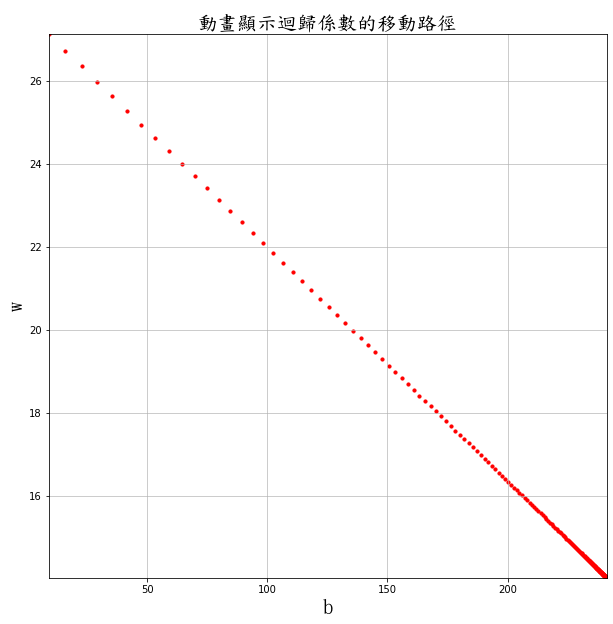

In [25]:
for i in range(len(Step_b)):
    plt.figure(figsize=(10,10))
    plt.title("動畫顯示迴歸係數的移動路徑",
              fontproperties=twfont1,fontsize=20)
    plt.xlabel("b",fontproperties=twfont1,fontsize=20) 
    plt.ylabel("w",fontproperties=twfont1,fontsize=20) 
    # X軸、Y軸刻度取array([Step_b,Step_w])的極值
    plt.xlim(np.min(np.array(Step_b)),
             np.max(np.array(Step_b)))
    plt.ylim(np.min(np.array(Step_w)),
             np.max(np.array(Step_w)))
    plt.scatter(Step_b[:i], Step_w[:i], s=10,color='r')
    plt.grid('k-', alpha=0.8)
    plt.pause(0.1)
    display.clear_output(wait=True)

### (12)顯示迴歸係數在損失函數等高線分布圖的移動路徑

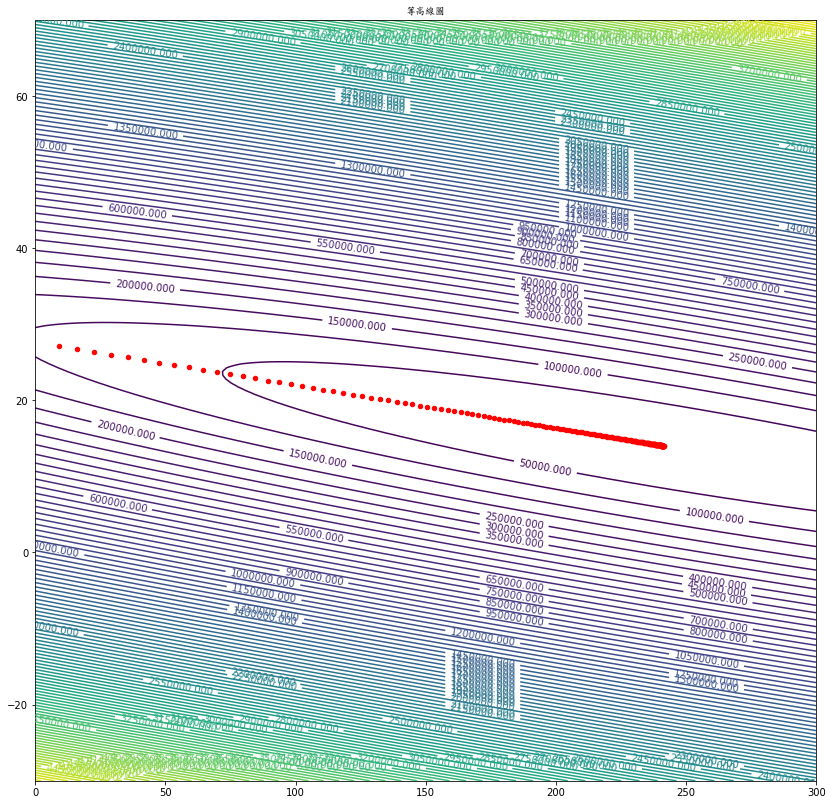

In [26]:
#取b和w的網格範圍
b=np.linspace(0,300,200)
w=np.linspace(-30,70,200)
#計算每一個網格點對應的損失函數值
L=np.zeros((200,200)) 
for i in range(200):
  for j in range(200):
    L[j][i]=0.5*np.sum((train_y-(b[i]+w[j]*train_x))**2)
#鋪設網格
b,w=np.meshgrid(b,w)
# 開啟繪圖區域
plt.figure(figsize=(14,14))
CS=plt.contour(b,w,L,100)
plt.clabel(CS,inline=1,fontsize=10)
plt.scatter(Step_b[0:], Step_w[0:], s=20,color='r')
plt.title('等高線圖',fontproperties=twfont1)
plt.show()

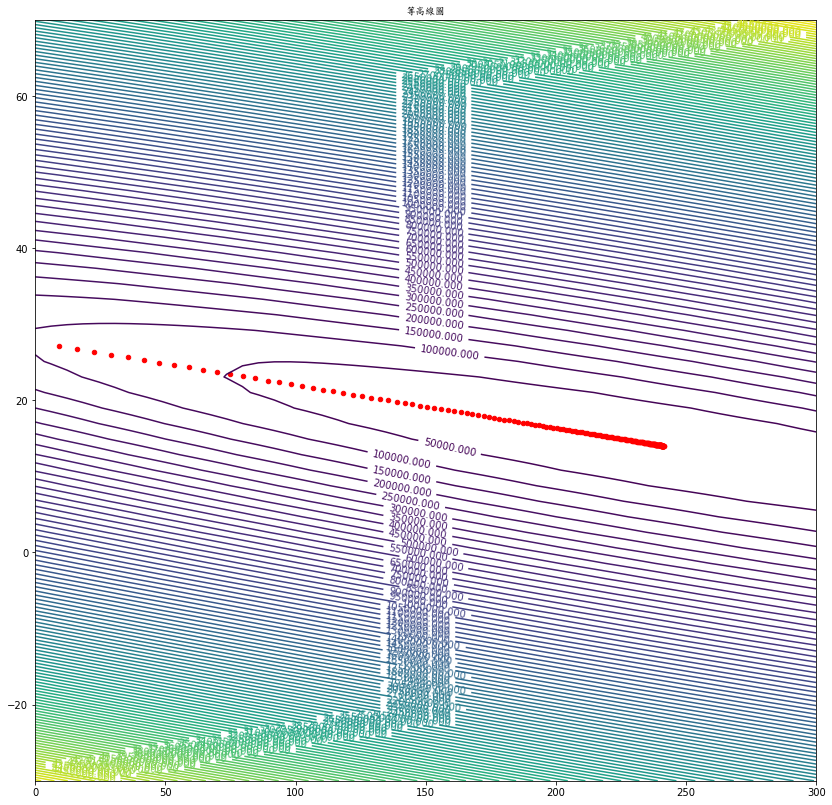

In [27]:
#取b和w的網格範圍
b=np.linspace(0,300,50)
w=np.linspace(-30,70,50)
#計算每一個網格點對應的損失函數值
L=np.zeros((50,50)) 
for i in range(50):
  for j in range(50):
    L[j][i]=0.5*np.sum((train_y-(b[i]+w[j]*train_x))**2)
#鋪設網格
b,w=np.meshgrid(b,w)
# 開啟繪圖區域
plt.figure(figsize=(14,14))
CS=plt.contour(b,w,L,100)
plt.clabel(CS,inline=1,fontsize=10)
plt.scatter(Step_b[0:], Step_w[0:], s=20,color='r')
plt.title('等高線圖',fontproperties=twfont1)
plt.show()